### Задание 2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/howpop_train.csv')
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356



**1. Изучите датасет, попробуйте понять какой столбец за что отвечает**
* `url`: ссылка на публикацию;
* `domain` - домен;
* `published` - дата публикации;
* `author` - автор;
* `flow` - направление(тема);
* `polling` - ;
* `content_len` - длина публикации(вероятно в символах);
* `title` - назавание;
* `comments` - комментарии ;
* `favs` - добавлено в избранное;
* `views` - просмотры;
* `votes_plus` - лайки;
* `votes_minus` - дизлайки;
* `views_lognorm` - логнормальное распределение просмотров;
* `favs_lognorm` - догнормальное распределение добавленных в избранное;
* `comments_lognorm` - логнормальное распределение комментариев;

**2. Удалите столбцы, названия которых заканчиваются на _lognorm. Выберите их с 
помощью filter() и удалите drop-ом**

In [3]:
df.drop(
    filter(lambda c: c.endswith('_lognorm'), df.columns),
    axis=1,
    inplace=True
)

In [4]:
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0


**3. Столбец published (время публикации) содержит строки. Чтобы работать с этими 
данными как с датой/временем публикации, приведите их к типу datetime:**

In [5]:
df.published = pd.to_datetime(df.published, yearfirst=True)

In [6]:
df.dtypes

url                    object
domain                 object
post_id                 int64
published      datetime64[ns]
author                 object
flow                   object
polling                  bool
content_len             int64
title                  object
comments                int64
favs                    int64
views                   int64
votes_plus            float64
votes_minus           float64
dtype: object

**4. Создайте несколько столбцов на основе данных о времени публикации:**

In [7]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]
df['day_of_week'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

In [8]:
df[['year', 'month', 'day_of_week', 'hour']]

,year,month,day_of_week,hour
0,2008,1,2,18
1,2008,1,2,18
2,2008,1,2,18
3,2008,1,3,1
4,2008,1,3,14
...,...,...,...,...
134132,2016,10,1,21
134133,2016,10,1,22
134134,2016,10,1,23
134135,2016,10,1,23


**5. Используя Seaborn, постройте визуализацию и покажите в каком месяце (и какого 
года) было больше всего публикаций.**


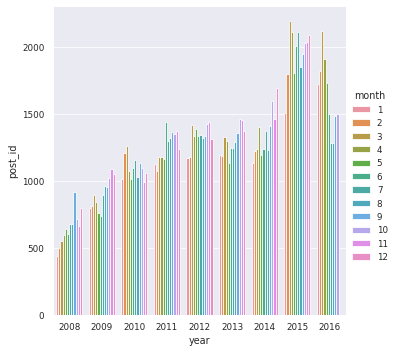

In [56]:
res = df.groupby(['year', 'month'], as_index=False).count()
data = res[['year', 'month', 'post_id']]
sns.catplot(x = 'year', y = 'post_id', hue = 'month', data=data, kind='bar')

**6. Используя Seaborn, постройте график зависимости числа публикаций от дня недели, 
используя параметр hue.**

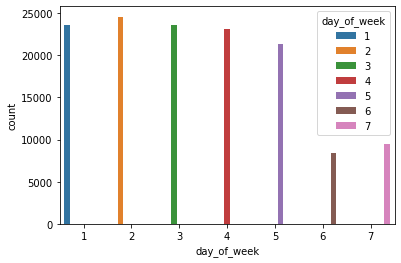

In [9]:
sns.countplot(x = 'day_of_week', data = df, hue='day_of_week')
plt.show()

**7. Используя Seaborn, проведите визуальный анализ и отметьте верные утверждения про данный датасет:**

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня - **Ложь**
* У опубликованных в 10 утра постов больше всего комментариев - **Ложь**
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра - **Истина**
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера - **Ложь**
* На хабре дневные статьи комментируют чаще, чем вечерние - **Ложь**

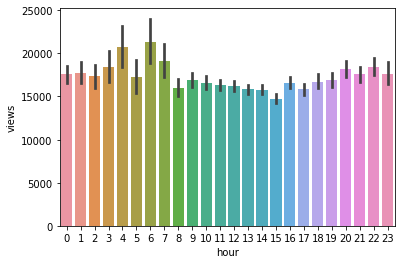

In [10]:
sns.barplot(x = df['hour'], y = df['views'])
plt.show()

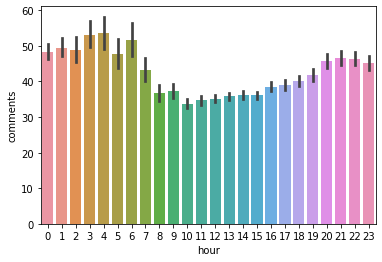

In [13]:
sns.barplot(x = df['hour'], y = df['comments'])
plt.show()

In [12]:
df.groupby(df['hour'])['views'].mean().idxmax()

6

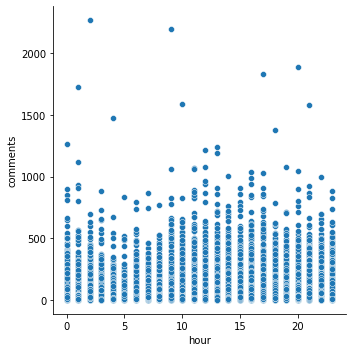

In [16]:
sns.relplot(x = df['hour'], y = df['comments'])
plt.show()

**8. Используя Seaborn, проведите визуальный анализ и определите кого из топ-20 авторов чаще всего минусуют?**

<AxesSubplot:xlabel='votes_minus', ylabel='author'>

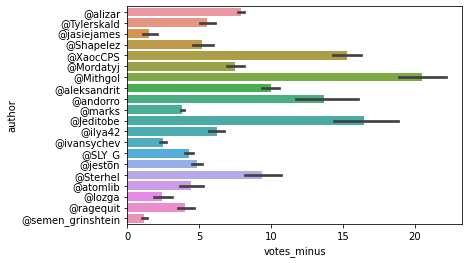

In [5]:
authors = df.groupby(['author'], as_index=False).count().sort_values(by='url', ascending=False)['author'][:20].to_list()
asd = df[df['author'].apply(lambda x: x in authors)]
sns.barplot(data=asd, x='votes_minus', y='author', orient='h')

**9. Используя Seaborn, сравните субботы и понедельники. Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?**

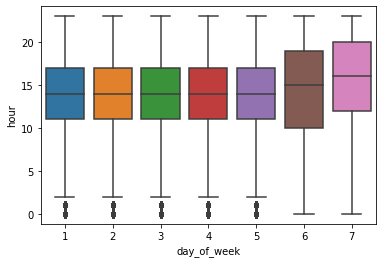

In [17]:
sns.boxplot(x=df['day_of_week'], y=df['hour'])
plt.show()

Ситуация обратная - по субботам авторы пишут ближе к вечеру, а в понедельник днём.